In [9]:
library("DESeq2")
library("ggplot2")

In [2]:
meta_path = "metadata.csv"
sampleTable = read.csv(meta_path, row.names = 1)
sampleTable$sample_type=factor(sampleTable$sample_type)
sampleTable$sample_type <- relevel(sampleTable$sample_type, ref="healthy")
sampleTable

,sample_type,sample_name,path
H1,healthy,H1,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H1.txt
H2,healthy,H2,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H2.txt
H3,healthy,H3,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H3.txt
H4,healthy,H4,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H4.txt
H5,healthy,H5,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H5.txt
H6,healthy,H6,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H6.txt
H7,healthy,H7,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H7.txt
H8,healthy,H8,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/H8.txt
UC1,uc,UC1,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/UC1.txt
UC2,uc,UC2,/home/gstupp/projects/Wolan/triflic_BI/UnenrichedTriflic-BISamples/data/UC2.txt


In [3]:
countData = read.csv("out/df_filt.csv", row.names = 1)
sampleTable = sampleTable[colnames(countData),]

In [4]:
dds = DESeqDataSetFromMatrix(countData, colData = sampleTable, ~ sample_type)
dds = DESeq(dds, minReplicatesForReplace=99, fitType = 'local')

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [23]:
attr(z, "percentVar")

NULL

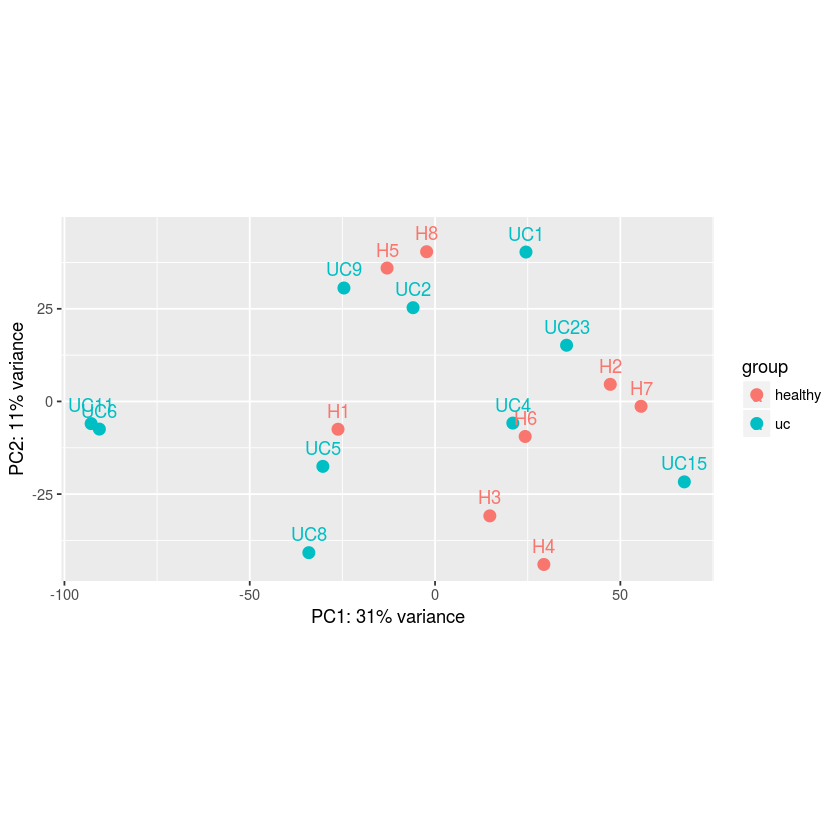

In [19]:
vsd <- varianceStabilizingTransformation(dds, blind = FALSE)
z = plotPCA(vsd, intgroup=c("sample_type"))
nudge <- position_nudge(y = 5)
z + geom_text(aes(label = name), position = nudge)

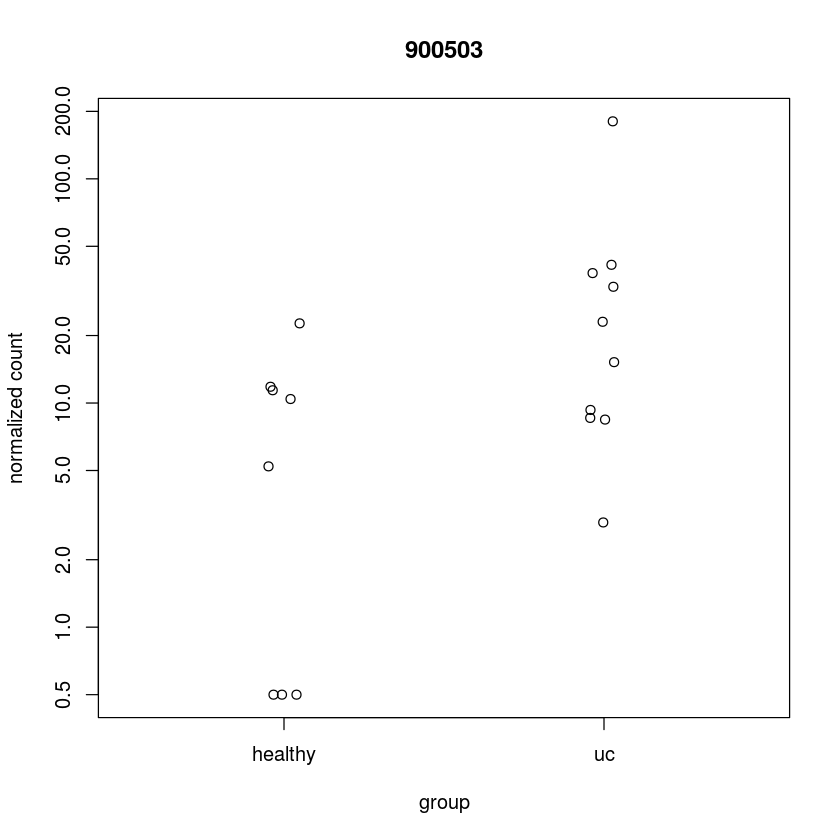

In [6]:
plotCounts(dds, "900503", intgroup = "sample_type")

In [44]:
# write out normalize, transformed count matrix
write.csv(getVarianceStabilizedData(dds), "out/df_norm_transformed.csv")